In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Machine learning step one: load your data do EDA and make sure all is what you expect. This can include:
- checking your features for NaNs and removing or imputing the data.
- understanding the types of data you are working with and the shape of your data .info(), .describe() and .shape are useful for this
- One hot encode your data if you are planning on working with linear models or other models that would benefit from transforming categorical variables into numeric variables.

- NOTE: Data exploration can be time consuming and it can take quite a while to clean your data and to decide what type of ML algorithm you need to use. It is ok! :-)

# Linear Regression

In [46]:
linear_data = pd.read_csv("./ml-linear-regression-Meg-Guidry/data/insurance.csv")

In [47]:
# Now lets make sure the data looks like we expet it to:
linear_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
# Now lets check to see what types of data we are working with and if any of the columns have NaN values:
linear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
# Check to see if we have any NaN values in our dataframe:
linear_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [50]:
# describe is a useful method for viewing which of your features are numeric:
linear_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
# From exploring the data I can see that we do not have any NaN values to worry about. 
# But we do have some categorical features in the data that we need to one hot encode:

Which features do we need to one hot encode? The features taht are type "object". For this dataset this includes:
- sex
- smoker
- region

The target variable for this dataset will be "charges" as this is what we will want to predict.

In [52]:
linear_data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

## One hot encoding

In [53]:
# One hot encoding, creating my own version of a one hot encoding function

def one_hot_encode(df_name, list_of_cols):
    test_linear_data = df_name.copy()
    
    for col in list_of_cols:
        dummies = pd.get_dummies(
            data= df_name[col],
            prefix= f"{col} = "
        )
        test_linear_data = pd.concat([test_linear_data, dummies], axis=1)
        test_linear_data.drop([col], axis=1, inplace=True)
    
    return test_linear_data

In [54]:
linear_data_OHE = one_hot_encode(linear_data, ["sex", "smoker", "region"])

In [55]:
linear_data_OHE.head()

,age,bmi,children,charges,sex = _female,sex = _male,smoker = _no,smoker = _yes,region = _northeast,region = _northwest,region = _southeast,region = _southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [56]:
linear_data_OHE.shape

(1338, 12)

In [57]:
# What happens when I use pd.get_dummies on the entire dataframe?
dummies = pd.get_dummies(data= linear_data)
dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [58]:
dummies.shape

(1338, 12)

### NOTE ON ONE HOT ENCODING: 

Insead of writing a new function for the one hot encoding step I should just use the existing function pd.get_dummies properly! If I give this function a dataframe it will return a new dataframe which has dummy variables for all the categorical data . it will also drop the original columns for you.



## Linear Regression - creating training and testing the model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
# Now that the data is one hot encoded, lets define the feature matrix and target variable:
X = linear_data_OHE.drop(["charges"], axis=1)
y = linear_data_OHE["charges"]

In [64]:
### Instantiate the model 

In [65]:
lr_model = LinearRegression()

### Create the train test split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Fit the instantiated model to the training data and make predictions!

In [73]:
lr_model.fit(X_train, y_train)
lrmodel_predictions = lr_model.predict(X_test)

### Analyse how the model performed with metrics:

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### MAE: Mean Absolute Error

In [78]:
MAE = mean_absolute_error(y_test, lrmodel_predictions)
MAE

4181.194473753645

#### MSE: Mean Squared Error

In [95]:
MSE = mean_squared_error(y_test, lrmodel_predictions)
MSE

33596915.851361476

#### K-folds cross validation. 

analysing the how our model performs with the test data is great, but it can be tricky to know just how well it is performing. Use cross-validation to explore the variance in error that exists in your model and to explore whether or not your model might be overfitting (high variance!)

In [90]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [82]:
# Initialise the KFold cross-validation model:
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
# Fit the kfold cross validation model:
cv_results = cross_val_score(
    estimator = lr_model, # select the model we want to test
    X = X, # in other scenarios this should be X_train
    y = y, 
    cv=kfold_cv, # tell what fold template to use
    scoring="neg_mean_squared_error" # This is an evaluation metric
)

cv_results

array([-33596915.85136148, -37439620.22608732, -33451562.85551281,
       -41559312.10772003, -38946008.53668635])

#### R^2: Coefficient of determination

In [94]:
# Fit the kfold cross validation model, this time lets see R^2:
cv_results = cross_val_score(
    estimator = lr_model, # select the model we want to test
    X = X, # in other scenarios this should be X_train
    y = y, 
    cv=kfold_cv, # tell what fold template to use
    scoring="r2" # This is an evaluation metric
)

cv_results

# You can interpret R^2 by saying: The estimator accounts for ___ percent of the variance that exists in the data. 

array([0.78359298, 0.7380458 , 0.79558615, 0.63243806, 0.75131533])

### NOTE: 

All scorer objects for the function cross_val_score follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [91]:
# Lets see the standard deviation for the cross validation errors:
round(np.std(cv_results), 2) 

3128575.44

## Logistic regression and Metrics

We need to use different evaluation metrics when assessing a logistic regression problem. Here are 4 of the most common types of metrics for a classification scenario:
1. Accuracy
2. Precision/ Recall/ F1
3. Sensitivity/ Specificity
4. AUC/ ROC

In [198]:
# Lets move on to practicing logistic regression. First we import our dataset:

lr_data = pd.read_csv("./ml-intro-to-classification-Meg-Guidry/data/diabetes.csv")

In [112]:
lr_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [110]:
lr_data.drop("DiabetesPedigreeFunction", axis=1, inplace=True)

In [111]:
lr_data.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

We can see above that the data does not have any NaN values, so we are ready to make and fit a logistic regression model that predicts diabetes. Before we do this let's look at the distribution of values for "Outcome"

In [101]:
lr_data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [104]:
from sklearn.linear_model import LogisticRegression

In [114]:
# Instantiate the logistic regression model
logr_model = LogisticRegression()

In [199]:
# Detine the independent and dependent variables:
X = lr_data.drop("Outcome", axis=1)
y = lr_data["Outcome"] 

In [140]:
X.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']

In [200]:
# Create the train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [117]:
# Fit the model to the training data:
logr_model.fit(X_train, y_train)

LogisticRegression()

In [120]:
# now use the trained model to predict the outcome of your X_test data. We will compare these predictions to the true predictions in the next step
predictions = logr_model.predict(X_test)

predictions

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

#### Accuracy Score
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [123]:
from sklearn.metrics import accuracy_score

logr_accuracy = accuracy_score(y_test, predictions)
logr_accuracy

0.7272727272727273

In [130]:
# Is this accuracy score good? Lets compare it to the distribution of outcome values:

lr_data["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

65% of the observations do not have diabetes, so an accuracy of 0.72 is better than if we predict 0 for all cases

#### Recall
$$Recall = \frac{TP}{TP + FN}$$

In [125]:
from sklearn.metrics import recall_score

logr_recall = recall_score(y_test, predictions)
logr_recall

0.6363636363636364

#### Precision
$$Precision = \frac{TP}{TP + FP}$$

In [127]:
from sklearn.metrics import precision_score

logr_precision = precision_score(y_test, predictions)
logr_precision

0.6140350877192983

#### F1-Score
$$F1= 2 * \frac{\large{precision * recall}}{\large{precision + recall}}$$

In [128]:
from sklearn.metrics import f1_score

logr_f1 = f1_score(y_test, predictions)
logr_f1

0.625

In [132]:
#### Confusion Matrix

from sklearn.metrics import confusion_matrix

logr_cm = confusion_matrix(y_test, predictions)
logr_cm

array([[77, 22],
       [20, 35]])

#### Sensitivity(recall) and specificity

In [137]:
from sklearn.metrics import recall_score

logr_recall = recall_score(y_test, predictions)
logr_recall

0.6363636363636364

In [142]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [164]:
#### Classification report

from sklearn.metrics import classification_report

logr_classification_report = classification_report(y_test, predictions, output_dict=True)
logr_classification_report["1"]

{'precision': 0.6140350877192983,
 'recall': 0.6363636363636364,
 'f1-score': 0.625,
 'support': 55.0}

## Nonlinear regression and classification!!

### Decision trees

In [207]:
# Lets use the diabetes data above with a decision tree classifier and assess the results!
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [196]:
# use classification report to assess the results:

dt_classification_report = classification_report(y_test, dt_predictions, output_dict=True)
dt_classification_report["1"]

{'precision': 0.68,
 'recall': 0.6181818181818182,
 'f1-score': 0.6476190476190475,
 'support': 55.0}

####  Viewing a decision tree

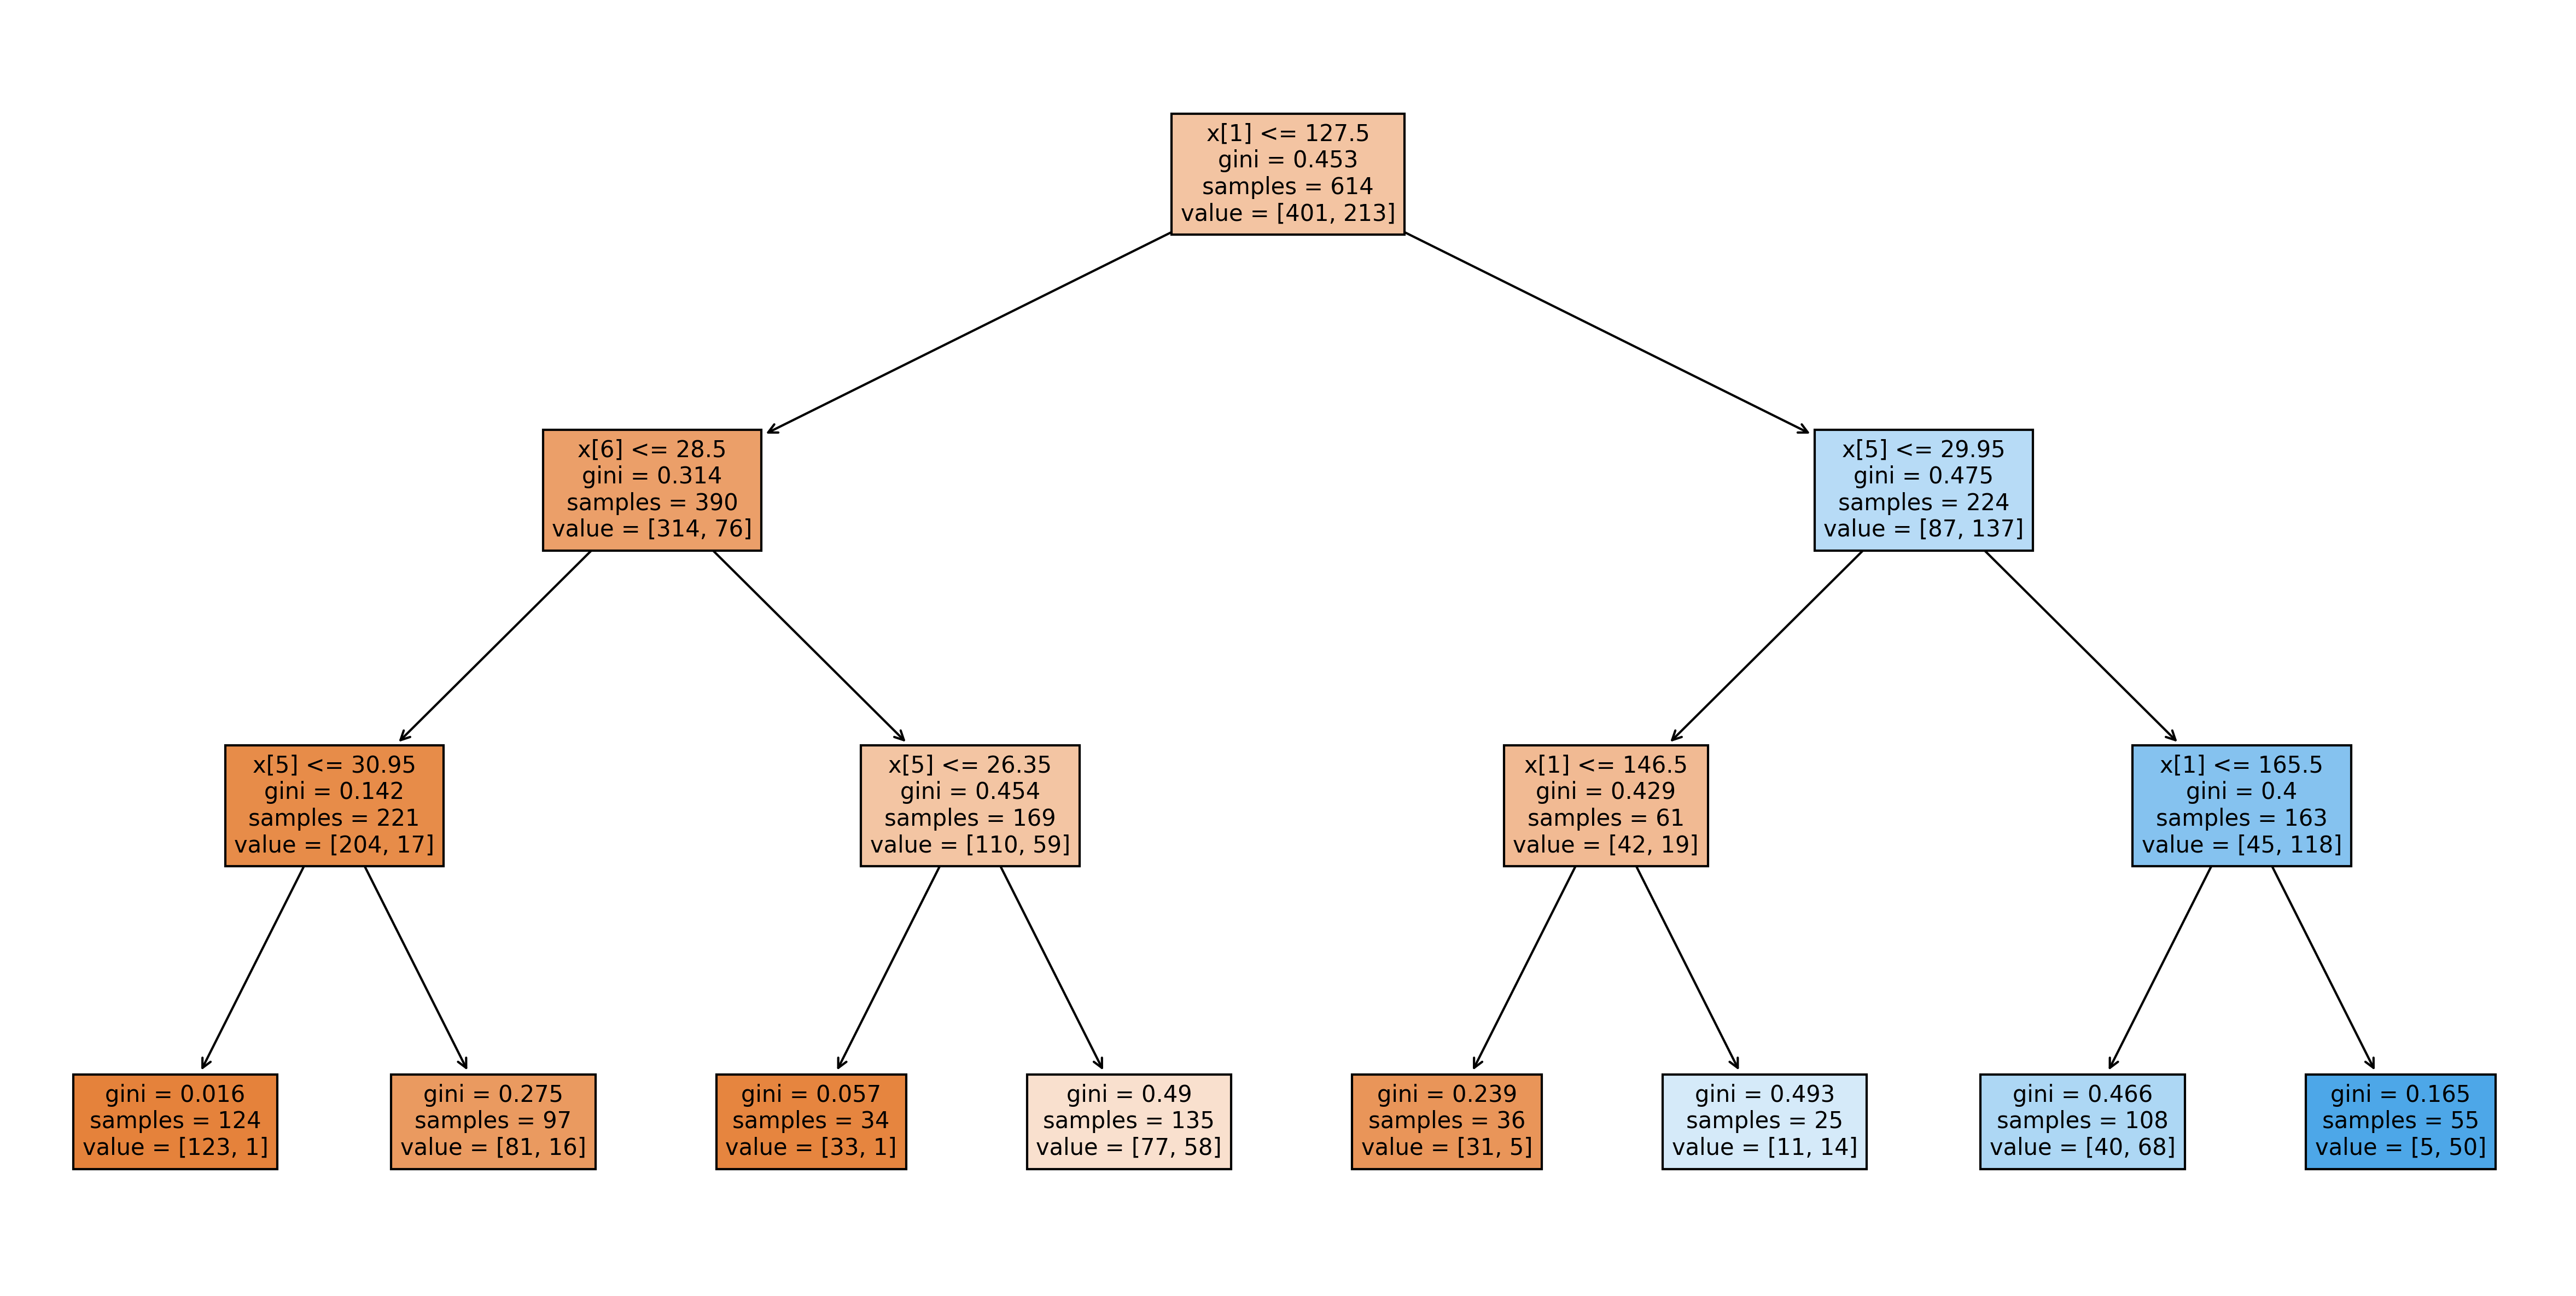

In [197]:
from sklearn import tree

plt.figure(figsize=(20,10), dpi=300)
tree.plot_tree(dt,
              filled=True,
              fontsize=10)
plt.show()

In [234]:
# OPTIONAL CHALLENGE: view how max depth changes the evaluation metrics of the decision tree:

def dt_max_depth_impact(min_depth_num, max_depth_num):
    output_dict = {}

    for n in range(min_depth_num, max_depth_num):
        temp_dt = DecisionTreeClassifier(max_depth = n)
        temp_dt.fit(X_train, y_train)
        temp_predictions = temp_dt.predict(X_test)
        temp_classification_report = classification_report(y_test, temp_predictions, output_dict=True)
        temp_classification_report["1"]["max_depth"] = n
        temp_metrics = temp_classification_report["1"]
        output_dict[f"max_depth={n}"] = temp_metrics
    
    output_dataframe = pd.DataFrame.from_dict(output_dict, orient="index")

    return output_dataframe
    

In [260]:
max_depth_metrics_df = dt_max_depth_impact(2,50)

max_depth_metrics_df.drop("support", axis=1, inplace=True)
max_depth_metrics_df.style.highlight_max(color='yellow', axis=0) 

,precision,recall,f1-score,max_depth
max_depth=2,0.727273,0.581818,0.646465,2
max_depth=3,0.680000,0.618182,0.647619,3
max_depth=4,0.558824,0.690909,0.617886,4
max_depth=5,0.760870,0.636364,0.693069,5
max_depth=6,0.611111,0.800000,0.692913,6
max_depth=7,0.622951,0.690909,0.655172,7
max_depth=8,0.645161,0.727273,0.683761,8
max_depth=9,0.672414,0.709091,0.690265,9
max_depth=10,0.639344,0.709091,0.672414,10
max_depth=11,0.655738,0.727273,0.689655,11


In [261]:
max_depth_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, max_depth=2 to max_depth=49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   precision  48 non-null     float64
 1   recall     48 non-null     float64
 2   f1-score   48 non-null     float64
 3   max_depth  48 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 2.9+ KB


Text(0.5, 1.0, 'How max_depth impacts decision tree precision')

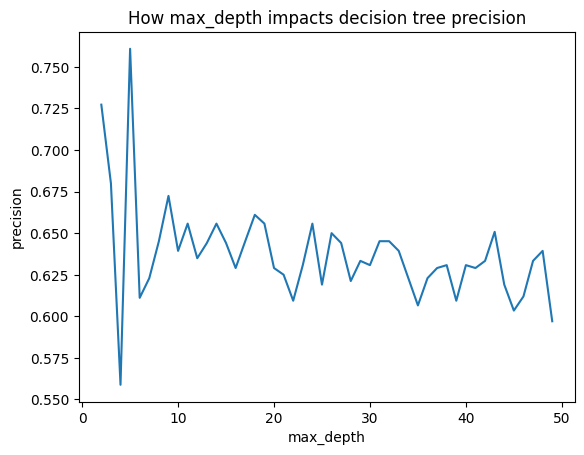

In [262]:
sns.lineplot(data=max_depth_metrics_df, x="max_depth", y="precision")
plt.title("How max_depth impacts decision tree precision")

Text(0.5, 1.0, 'How max_depth impacts decision tree recall')

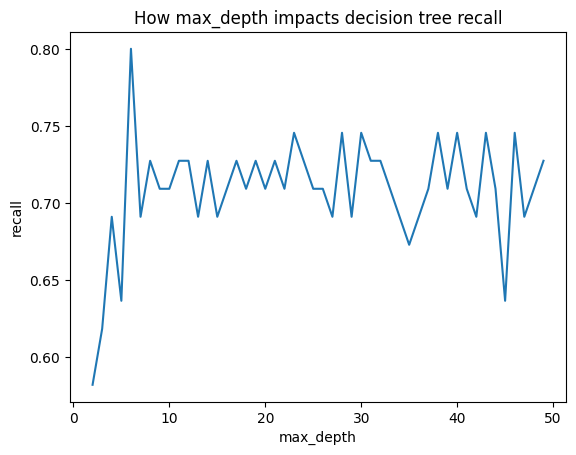

In [263]:
sns.lineplot(data=max_depth_metrics_df, x="max_depth", y="recall")
plt.title("How max_depth impacts decision tree recall")

Text(0.5, 1.0, 'How max_depth impacts decision tree f1-score')

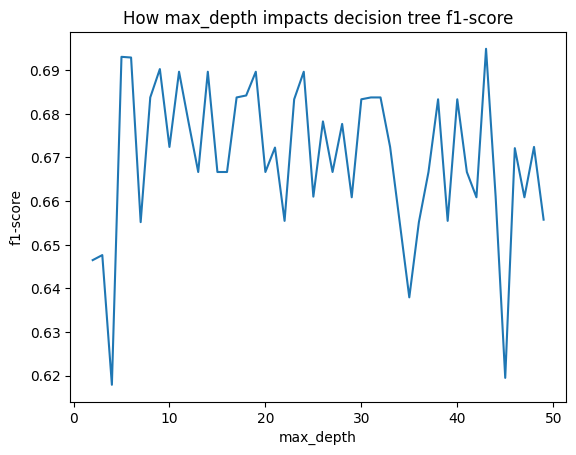

In [264]:
sns.lineplot(data=max_depth_metrics_df, x="max_depth", y="f1-score")
plt.title("How max_depth impacts decision tree f1-score")

### Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [166]:
rf_classification_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_classification_report["1"]

{'precision': 0.631578947368421,
 'recall': 0.6545454545454545,
 'f1-score': 0.6428571428571428,
 'support': 55.0}

In [160]:
rf_precision = precision_score(y_test, rf_predictions)
rf_precision

0.631578947368421

In [175]:
# Create a dataframe to view the precision, recall, f1, and "support" for the logistic regression model, 
# the decision tree classifier, and the random forest classifier

metrics_dict = {"LogisticRegression":logr_classification_report["1"], 
                "DecisionTreeClassifier": dt_classification_report["1"], 
                "RandomForestClassifier": rf_classification_report["1"]
               }

metrics_df = pd.DataFrame.from_dict(metrics_dict)
metrics_df.drop("support", axis=0, inplace=True)
metrics_df.style.highlight_max(color='yellow', axis=1) 

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
precision,0.614035,0.551724,0.631579
recall,0.636364,0.581818,0.654545
f1-score,0.625000,0.566372,0.642857


### Using multiple models on a dataset and picking the best one 

Here I will practice model selection by training and assessing three different models before choosing the most appropriate one. Here are the model types I will use:
1. Logistic regression,
2. Decision tree classifier
3. Random forest classifier
4. k-means clustering 